In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Online_Passive_Aggressive_Algorithm_definitions import passive_agrresive_algorithm
import timeit
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('diabetes_scale.csv')
df = df.fillna(value=0)

In [4]:
df = df.set_index('Sno',drop=True)

In [5]:
train_X = df.iloc[:,0:8]
train_X = train_X.iloc[0:700]
test_X = df.iloc[700:769,0:8]

In [6]:
train_Y = df.iloc[:,8:9]
train_Y = train_Y.iloc[0:700]
test_Y = df.iloc[700:769,8:9]

In [7]:
train_Y = np.ravel(train_Y)
test_Y = np.ravel(test_Y)

## Passive Aggresive Algorithm with Classic Update

In [8]:
start = timeit.default_timer()
pred_err_cu, weights_cu_per_50_egs = passive_agrresive_algorithm(train_X,train_Y,type_of_update='cu')
c_cu = np.count_nonzero(pred_err_cu, axis = 0)
stop = timeit.default_timer()

print('Passive Aggressive Algorithm accuracy for classic update is: {}'.format(1 - float(c_cu) / train_X.shape[0]),'with time taken:',stop-start)

Passive Aggressive Algorithm accuracy for classic update is: 0.6842857142857143 with time taken: 0.6319862579985056


### Evaluation on Test data for every set of weights obtained after every 50 examples

In [9]:
accuracy_array= []
for i in range(len(weights_cu_per_50_egs)):
    Y_pred = np.sign(np.dot(weights_cu_per_50_egs[i].T, test_X.T))
    c = np.count_nonzero(Y_pred - test_Y)
    accuracy = 1 - float(c) / test_X.shape[0]
    accuracy_array.append(accuracy)

Text(0.5,1,'Accuracy for Classic Update')

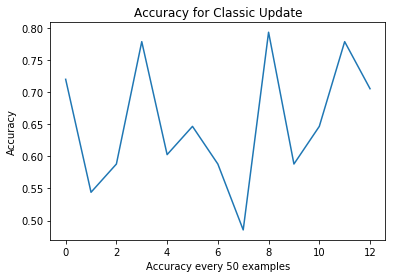

In [11]:
plt.plot(accuracy_array)
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Accuracy for Classic Update' )

## Passive Aggressive Algorithm with First Relaxation Update

In [23]:
pred_err_fr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
weights_fr_for_50_egs_for_different_C = []
array_for_the_value_of_C_fr = []
for i in [0.01,0.1,1,10]:
    start = timeit.default_timer()
    pred_err_fr, weights_fr_for_50_egs = passive_agrresive_algorithm(train_X,train_Y,type_of_update='fr',C=i)
    stop = timeit.default_timer()
    c_fr = np.count_nonzero(pred_err_fr, axis = 0)
    weights_fr_for_50_egs_for_different_C.append(weights_fr_for_50_egs)
    array_for_the_value_of_C_fr.append(i)
    print('Passive Aggressive Algorithm accuracy for first relaxation update is: {}'.format(1 - float(c_fr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:', stop - start)
    pred_err_fr_df.loc[i,'Accuracy']= 1 - float(c_fr) / train_X.shape[0]
    pred_err_fr_df.loc[i,'Time Taken'] = stop - start

Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6571428571428571 for C equal to: 0.01 with time taken: 0.09732356600034109
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.72 for C equal to: 0.1 with time taken: 0.09436627099967154
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.69 for C equal to: 1 with time taken: 0.09924189500088687
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6842857142857143 for C equal to: 10 with time taken: 0.10537169900089793


### Evaluation on Test data for every set of weights obtained after every 50 examples

In [24]:
accuracy_array_fr= []
array_for_the_value_of_C_fr_2 = []
for i in range(len(weights_fr_for_50_egs_for_different_C)):
    for j in range(len(weights_fr_for_50_egs_for_different_C[0])):
        Y_pred = np.sign(np.dot(weights_fr_for_50_egs_for_different_C[i][j].T, test_X.T))
        c = np.count_nonzero(Y_pred - test_Y)
        accuracy = 1 - float(c) / test_X.shape[0]
        accuracy_array_fr.append(accuracy)
        array_for_the_value_of_C_fr_2.append(array_for_the_value_of_C_fr[i])
        #print(weights_fr_for_50_egs_for_different_C[i][j],accuracy)

In [25]:
df = pd.DataFrame(columns=['Value_of_C','Accuracy'])
for i in range(len(accuracy_array_fr)): 
    df.loc[i,'Value_of_C'] = array_for_the_value_of_C_fr_2[i]
    df.loc[i,'Accuracy'] = accuracy_array_fr[i]

Text(0.5,1,'Value of C is 0.01')

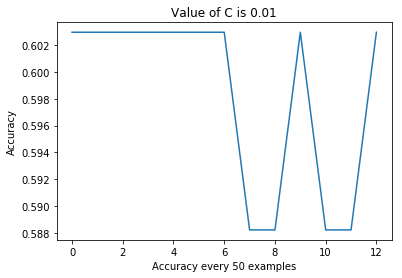

In [27]:
plt.plot(range(13),df.loc[0:12, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 0.01' )

Text(0.5,1,'Value of C is 0.1')

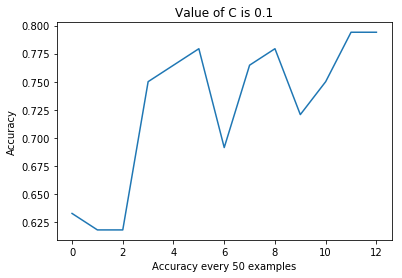

In [28]:
plt.plot(range(13),df.loc[13:25, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 0.1' )

Text(0.5,1,'Value of C is 1')

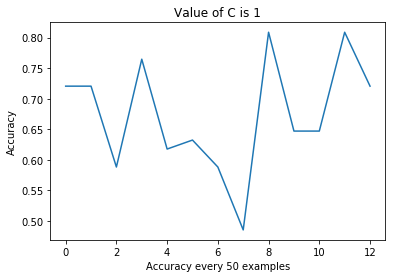

In [29]:
plt.plot(range(13),df.loc[26:38, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 1' )

Text(0.5,1,'Value of C is 10')

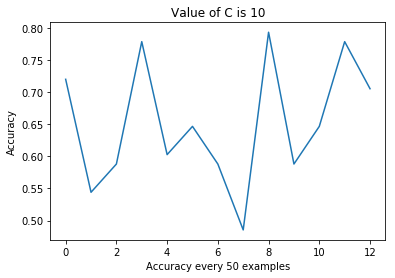

In [30]:
plt.plot(range(13),df.loc[39:51, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 10' )

### Evaluation of Online learning algorithm for different values of C.

Text(0.5,1,'Plot for Accuracy of Algorithm for First Relaxation Update')

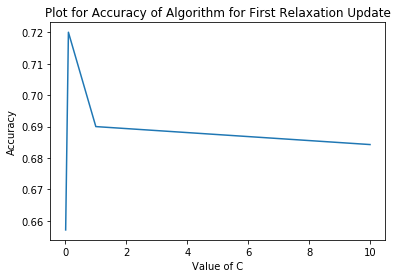

In [31]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for First Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for First Relaxation Update')

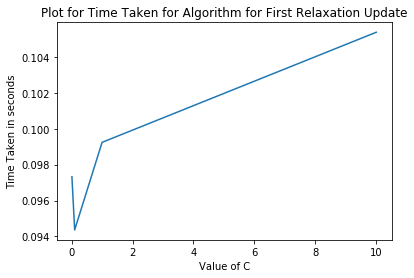

In [32]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for First Relaxation Update')

## Passive Aggressive Algorithm with Second Relaxation Update

In [33]:
pred_err_sr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
weights_sr_for_50_egs_for_different_C = []
array_for_the_value_of_C_sr = []
for i in [0.1,1,10,100,200,300]:
    start = timeit.default_timer()
    pred_err_sr, weights_sr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='sr',C=i)
    stop = timeit.default_timer()
    c_sr = np.count_nonzero(pred_err_sr, axis = 0)
    weights_sr_for_50_egs_for_different_C.append(weights_sr)
    print('Passive Aggressive Algorithm accuracy for second relaxation update is: {}'.format(1 - float(c_sr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:',stop-start)
    array_for_the_value_of_C_sr.append(i)
    pred_err_sr_df.loc[i,'Accuracy']= 1 - float(c_sr) / train_X.shape[0]
    pred_err_sr_df.loc[i,'Time Taken']= stop- start

Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6857142857142857 for C equal to: 0.1 with time taken: 0.10547721500006446
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.69 for C equal to: 1 with time taken: 0.10230974000114657
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.72 for C equal to: 10 with time taken: 0.10236766699927102
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.7128571428571429 for C equal to: 100 with time taken: 0.09617449700090219
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6942857142857143 for C equal to: 200 with time taken: 0.09719406700060063
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6742857142857143 for C equal to: 300 with time taken: 0.10244216899991443


### Evaluation on Test data for every set of weights obtained after every 50 examples

In [34]:
accuracy_array_sr= []
array_for_the_value_of_C_sr_2 = []
for i in range(len(weights_sr_for_50_egs_for_different_C)):
    for j in range(len(weights_sr_for_50_egs_for_different_C[0])):
        Y_pred_sr = np.sign(np.dot(weights_sr_for_50_egs_for_different_C[i][j].T, test_X.T))
        c = np.count_nonzero(Y_pred_sr - test_Y)
        accuracy = 1 - float(c) / test_X.shape[0]
        accuracy_array_sr.append(accuracy)
        array_for_the_value_of_C_sr_2.append(array_for_the_value_of_C_sr[i])
        #print(weights_fr_for_50_egs_for_different_C[i][j],accuracy)

In [35]:
df1 = pd.DataFrame(columns=['Value_of_C','Accuracy'])
for i in range(len(accuracy_array_sr)): 
    df1.loc[i,'Value_of_C'] = array_for_the_value_of_C_sr_2[i]
    df1.loc[i,'Accuracy'] = accuracy_array_sr[i]

Text(0.5,1,'Value of C is 0.1')

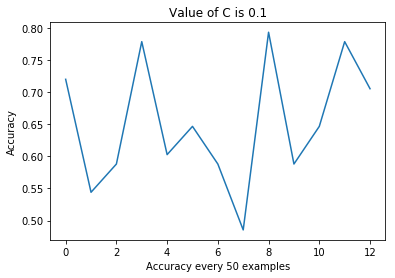

In [36]:
plt.plot(range(13),df1.loc[0:12, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 0.1' )

Text(0.5,1,'Value of C is 1')

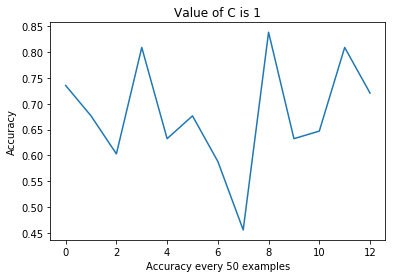

In [37]:
plt.plot(range(13),df1.loc[13:25, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 1' )

Text(0.5,1,'Value of C is 10')

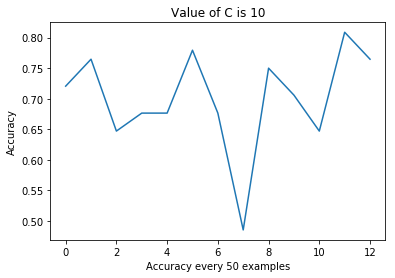

In [38]:
plt.plot(range(13),df1.loc[26:38, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 10' )

Text(0.5,1,'Value of C is 100')

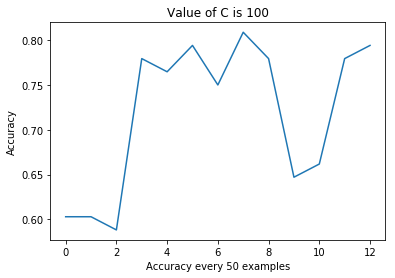

In [39]:
plt.plot(range(13),df1.loc[39:51, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 100' )

Text(0.5,1,'Value of C is 200')

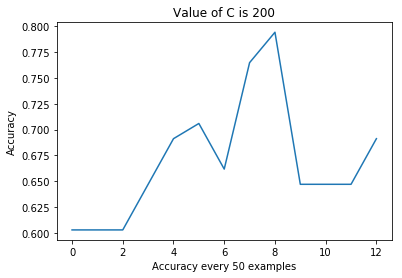

In [40]:
plt.plot(range(13),df1.loc[52:64, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 200' )

Text(0.5,1,'Value of C is 300')

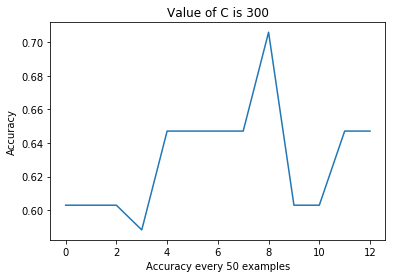

In [41]:
plt.plot(range(13),df1.loc[65:77, 'Accuracy'])
plt.xlabel('Accuracy every 50 examples')
plt.ylabel('Accuracy')
plt.title('Value of C is 300' )

## Evaluation of Online learning algorithm for different values of C.

Text(0.5,1,'Plot for Accuracy of Algorithm for Second Relaxation Update')

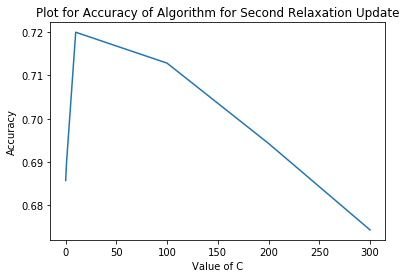

In [42]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for Second Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for Second Relaxation Update')

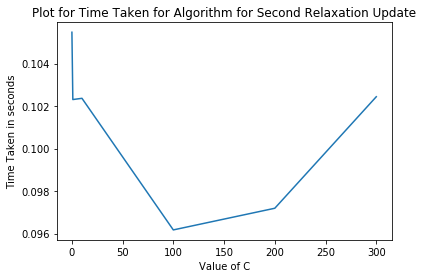

In [43]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for Second Relaxation Update')

## Comparison with Support Vector Machines

In [17]:
clf = SVC(kernel='linear')
clf.fit(train_X,train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
clf.score(test_X,test_Y)

0.8088235294117647

# Introducing noise by random flipping of labels

Introducing Noise

In [44]:
noise_factor=0.3
m=int(len(train_Y)*noise_factor)

idx = np.random.choice(len(train_Y),abs(m),replace=False)
train_Y[idx]= -train_Y[idx]

### a. Passive Aggressive Algorithm with Classic Update with random flipping of labels

In [45]:
start = timeit.default_timer()
pred_err_cu, weights_cu = passive_agrresive_algorithm(train_X,train_Y,type_of_update='cu')
c_cu = np.count_nonzero(pred_err_cu, axis = 0)
stop = timeit.default_timer()
print('Passive Aggressive Algorithm accuracy for classic update is: {}'.format(1 - float(c_cu) / train_X.shape[0]),'with time taken:',stop-start)

Passive Aggressive Algorithm accuracy for classic update is: 0.53 with time taken: 0.11779719700098212


### b. Passive Aggressive Algorithm with First Relaxation Update with random flipping of labels

In [46]:
pred_err_fr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10]:
    start = timeit.default_timer()
    pred_err_fr, weights_fr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='fr',C=i)
    stop = timeit.default_timer()
    c_fr = np.count_nonzero(pred_err_fr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for first relaxation update is: {}'.format(1 - float(c_fr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:', stop - start)
    pred_err_fr_df.loc[i,'Accuracy']= 1 - float(c_fr) / train_X.shape[0]
    pred_err_fr_df.loc[i,'Time Taken'] = stop - start

Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5785714285714285 for C equal to: 0.0001 with time taken: 0.10638719399867114
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5785714285714285 for C equal to: 0.001 with time taken: 0.09616394099975878
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5785714285714285 for C equal to: 0.01 with time taken: 0.10155424799995671
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5814285714285714 for C equal to: 0.1 with time taken: 0.10170418799862091
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5385714285714286 for C equal to: 1 with time taken: 0.1073784540003544
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.53 for C equal to: 10 with time taken: 0.09401389300001028


Text(0.5,1,'Plot for Accuracy of Algorithm for First Relaxation Update')

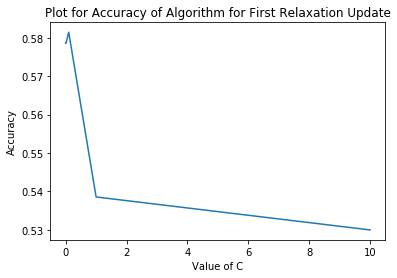

In [47]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for First Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for First Relaxation Update')

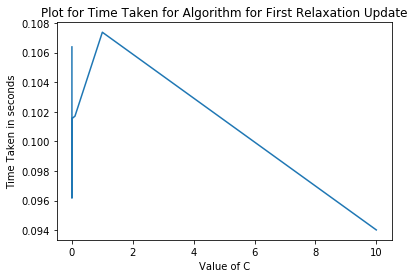

In [48]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for First Relaxation Update')

### c. Passive Aggressive Algorithm with Second Relaxation Update with random flipping of labels

In [49]:
pred_err_sr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10,100,200,300]:
    start = timeit.default_timer()
    pred_err_sr, weights_sr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='sr',C=i)
    stop = timeit.default_timer()
    c_sr = np.count_nonzero(pred_err_sr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for second relaxation update is: {}'.format(1 - float(c_sr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:',stop-start)
    pred_err_sr_df.loc[i,'Accuracy']= 1 - float(c_sr) / train_X.shape[0]
    pred_err_sr_df.loc[i,'Time Taken']= stop- start

Passive Aggressive Algorithm accuracy for second relaxation update is: 0.53 for C equal to: 0.0001 with time taken: 0.10627885400026571
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.53 for C equal to: 0.001 with time taken: 0.09883723900020414
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.53 for C equal to: 0.01 with time taken: 0.09285163499953342
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.53 for C equal to: 0.1 with time taken: 0.09625521399902937
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.54 for C equal to: 1 with time taken: 0.09820488600053068
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5571428571428572 for C equal to: 10 with time taken: 0.09525199999916367
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5814285714285714 for C equal to: 100 with time taken: 0.10787013499975728
Passive Aggressive Algorithm accuracy 

Text(0.5,1,'Plot for Accuracy of Algorithm for Second Relaxation Update')

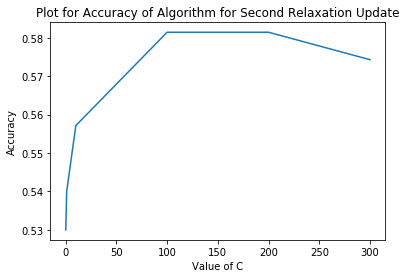

In [50]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for Second Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for Second Relaxation Update')

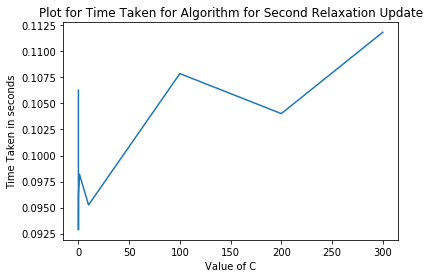

In [51]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for Second Relaxation Update')